In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
from pbcpy.base import Cell
from pbcpy.grid import Grid

In [5]:
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space
from pbcpy.base import Coord
from pbcpy.system import System

In [6]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

# Aluminium with local PP

In [7]:
mol = PP('Local_Pseudopotentials/Al_fde_rho.pp').read()

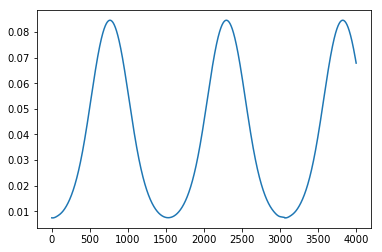

In [11]:
x0 = mol.ions[0].pos
r0 = 10*Coord(pos=[0.0,0.0,1.0], cell= mol.cell)
plotcut_1D_dens = mol.plot.get_plotcut(x0=x0, r0=r0, nr = 4000)
plt.plot(plotcut_1D_dens.values)
plt.show()

In [39]:
density = mol.plot
type(density)

pbcpy.grid_functions.Grid_Function_Base

In [41]:
grid_real = Grid_Space(density.grid.at,density.grid.nr)
mydens = Grid_Function(grid_real,griddata_3d=density.values)
type(grid_real), type(mydens)

(pbcpy.grid.Grid_Space, pbcpy.grid_functions.Grid_Function)

* Calculate FFT

In [14]:
mydens_G = mydens.fft()

In [42]:
g2_al_fcc = grid_real.reciprocal_grid.dist_values()**2
np.shape(g2_al_fcc)

((45, 45, 45), numpy.ndarray)

# Compute TF potential: $v_{TF}\propto \big[\rho(\mathbf{r})\big]^{\frac{2}{3}}$

In [17]:
pot = Grid_Function(mydens)

In [43]:
pot.values  = mydens.values.copy()**(2/3)

(45, 45, 45)

* First tries of mashine learning

In [20]:
np.shape(pot.values)

(45, 45, 45)

In [21]:
x = np.reshape(mydens.values,(np.shape(mydens.values)[0]*np.shape(mydens.values)[1]*np.shape(mydens.values)[2],))
y = np.reshape(pot.values,(np.shape(pot.values)[0]*np.shape(pot.values)[1]*np.shape(pot.values)[2],))

In [28]:
np.shape(x),np.shape(y)

((91125,), (91125,))

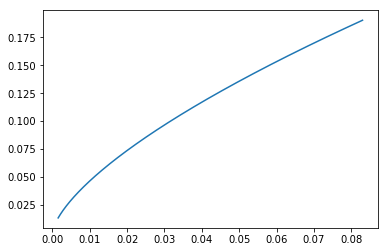

In [45]:
indx  = np.argsort(x)
X=x[indx]
Y=y[indx]
plt.plot(X,Y)
plt.show()

In [47]:
# must reshape due to a glitch in sklearn
X=np.reshape(X,(np.shape(X)[0],1))
Y=np.reshape(Y,(np.shape(Y)[0],1))

np.shape(X), np.shape(Y)

((91125, 1), (91125, 1))

In [36]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model.score(X,Y)

0.97672400696014816

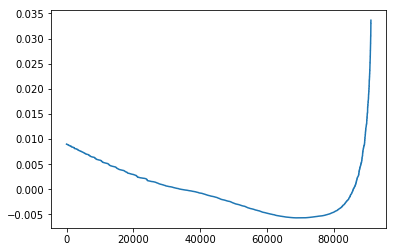

In [38]:
plt.plot(model.predict(X)-Y)
plt.show()

## Let's try some neural networks

In [55]:
from sklearn.neural_network import MLPRegressor

In [56]:
model2 = MLPRegressor()

In [57]:
model2.fit(X,Y)

/home/johannes/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
model2.score(X,Y)

0.99574932566317931

In [77]:
acc = model2.predict(X)-y
np.shape(pre), np.shape(y)

((91125,), (91125,))

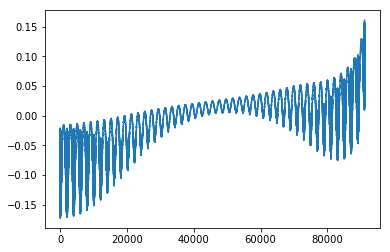

In [78]:
plt.plot(acc)
plt.show()